In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
market = pd.read_csv("marketing_sales_data.csv")
market.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [3]:
market.shape

(572, 5)

In [4]:
market.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

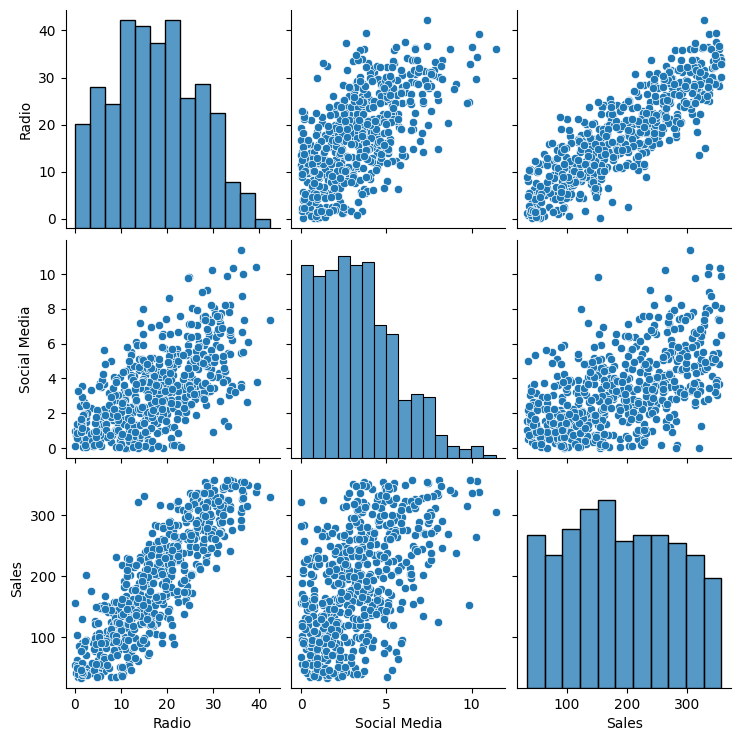

In [5]:
sns.pairplot(market)
plt.show()

In [6]:
train = market.sample(frac = 0.75, random_state=0)
test = market.drop(train.index)

In [7]:
train.head()

,TV,Radio,Social Media,Influencer,Sales
231,Low,13.527680,1.309440,Micro,134.697120
268,Medium,18.181466,2.970730,Mega,232.225684
315,High,20.299455,8.637936,Nano,268.565732
391,High,28.660045,3.637390,Macro,321.744457
179,Medium,14.849558,6.545392,Micro,181.661600


In [8]:
test.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
3,Medium,20.108487,2.728374,Mega,195.102176
9,High,26.914287,6.074165,Mega,322.466797
11,Low,6.233074,3.695363,Macro,45.074834
19,Medium,12.840594,2.482908,Nano,214.786639


In [9]:
train_subset = train[["Radio", "Sales"]]
test_subset = test[["Radio", "Sales"]]

In [10]:
train_subset.head()

,Radio,Sales
231,13.527680,134.697120
268,18.181466,232.225684
315,20.299455,268.565732
391,28.660045,321.744457
179,14.849558,181.661600


In [11]:
test_subset.head()

,Radio,Sales
0,3.518070,55.261284
3,20.108487,195.102176
9,26.914287,322.466797
11,6.233074,45.074834
19,12.840594,214.786639


In [12]:
ols_market = ols(formula = "Sales ~ Radio", data = train_subset)

In [13]:
model = ols_market.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1237.
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.40e-128
Time:                        15:36:52   Log-Likelihood:                -2251.0
No. Observations:                 429   AIC:                             4506.
Df Residuals:                     427   BIC:                             4514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8594      4.745      9.033      0.000      33.533      52.186
Radio          8.4170      0.239     35.171      0.000       7.947       8.887
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.088
Skew:                           0.022   Prob(JB):                        0.957
Kurtosis:                       3.055   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

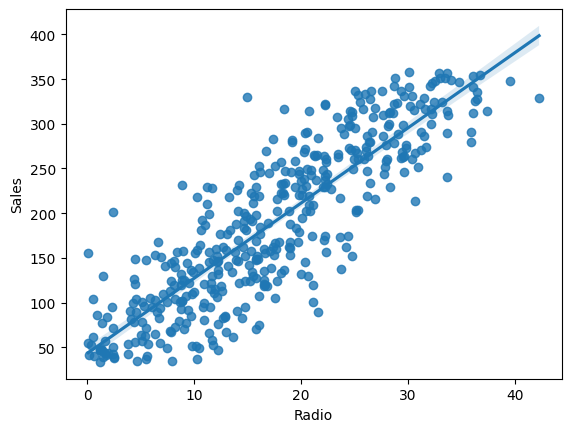

In [15]:
sns.regplot(x = "Radio", y = "Sales", data = train_subset)
plt.show()

In [16]:
residuals = model.resid
residuals

231   -22.024867
268    36.332763
315    54.845684
391    37.653283
179    13.813358
         ...    
323   -20.478144
516   -22.510326
248    66.404221
410    31.676262
555    -8.268191
Length: 429, dtype: float64

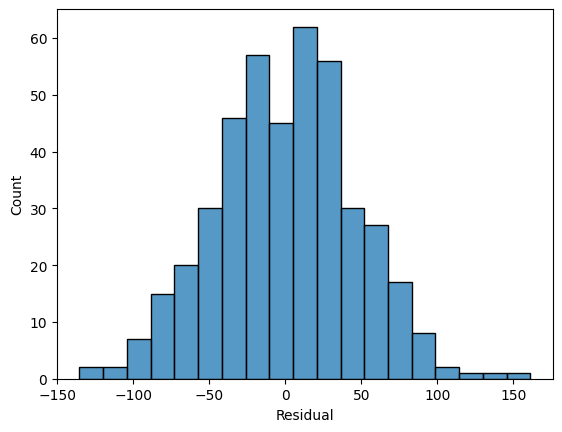

In [17]:
sns.histplot(residuals)
plt.xlabel("Residual")
plt.show()

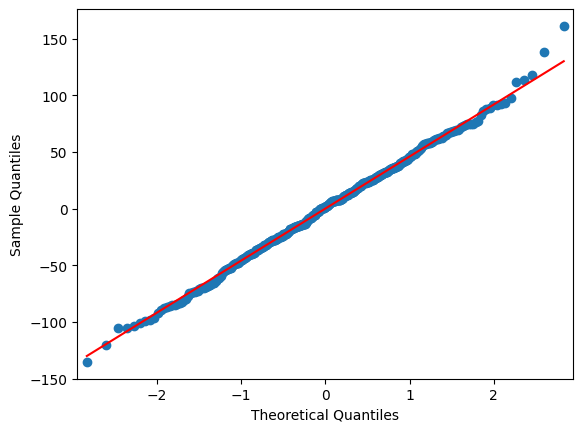

In [18]:
sm.qqplot(residuals, line='s')
plt.show()

In [19]:
preds_train = model.predict(train_subset["Radio"])
preds_train

231    156.721987
268    195.892921
315    213.720048
391    284.091174
179    167.848243
          ...    
323    293.680315
516    350.102828
248    285.125298
410    298.967452
555     54.901523
Length: 429, dtype: float64

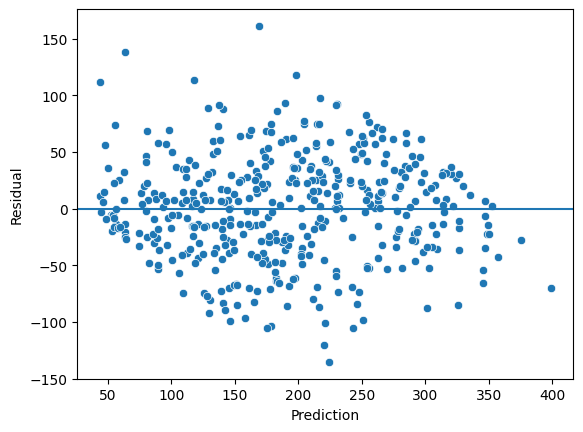

In [20]:
sns.scatterplot(x = preds_train, y = residuals)
plt.axhline(0)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.show()

In [21]:
preds_test = model.predict(test_subset["Radio"])
preds_test

0       72.471055
3      212.112667
9      269.397116
11      95.323255
19     150.938780
          ...    
544     85.965212
551    128.534124
554    202.556233
559    158.868176
571    154.142659
Length: 143, dtype: float64